In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/New_120dog breeds-299.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset299')

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator


data_dir = pathlib.Path('/content/projectDataset299/New_120dog breeds-299')

data_test = data_dir / 'test'

In [ ]:
batch_size = 16
img_size = 299

In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [ ]:
# test_datagen = ImageDataGenerator(
#     preprocessing_function=keras.applications.inception_v3.preprocess_input,
# )


# test_generator = test_datagen.flow_from_directory(
#                         directory=data_test,
#                         shuffle=False,
#                         class_mode='categorical',
#                         color_mode='rgb',
#                         target_size=(img_size, img_size))

# y_true = test_generator.labels



Found 1200 images belonging to 120 classes.


In [ ]:
testing_datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
)
testing_generator = testing_datagen.flow_from_directory(
    directory=data_test,
    shuffle=False,
    class_mode='categorical',
    color_mode='rgb',
    target_size=(img_size, img_size)
)


from keras.utils import to_categorical
testing_labels = to_categorical(testing_generator.labels)

Found 1200 images belonging to 120 classes.


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/InceptionV3-299-Epoch50_New120Breeds_Version6.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

import itertools



y_pred = model.predict(testing_generator)

38/38 [==============================] - 21s 234ms/step


In [ ]:
from keras.utils import to_categorical

y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
y_true = testing_generator.labels
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
print("y_true shape:", y_true.shape)
print("y_pred_classes shape:", y_pred_classes.shape)


y_true shape: (1200,)
y_pred_classes shape: (1200,)


In [ ]:
print(y_true)
print(y_pred_classes)

[  0   0   0 ... 119 119 119]
[  0   0  48 ...  57 119 100]


In [ ]:
import numpy as np
count = np.count_nonzero(y_true != y_pred_classes)
print(count)

124


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_true, y_pred_classes)
f1_score = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')

print('Testing accuracy:', accuracy)
print('F1 score:', f1_score)
print('Recall:', recall)
print('Precision:', precision)


Testing accuracy: 0.8966666666666666
F1 score: 0.8932765031174138
Recall: 0.8966666666666666
Precision: 0.9038781935656937


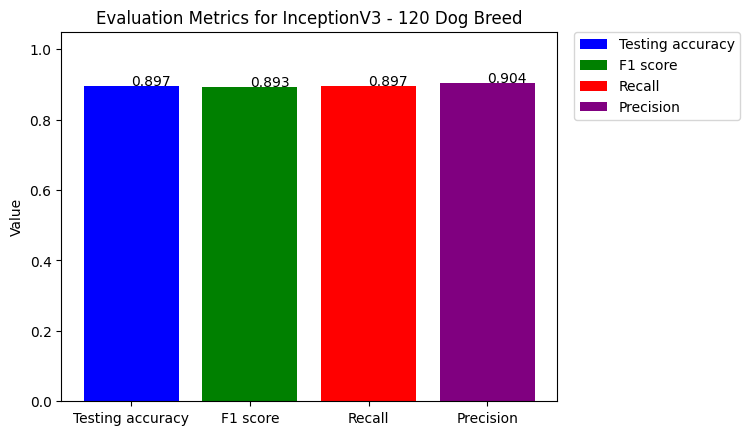

In [ ]:
# TestingACC, recall, f1-score, presicion
import matplotlib.pyplot as plt

# accuracy = 0.93
# f1_score = 0.9286108132178744
# recall = 0.93
# precision = 0.9368409368409369

plt.bar(['Testing accuracy', 'F1 score', 'Recall', 'Precision'], 
        [accuracy, f1_score, recall, precision], 
        color=['blue', 'green', 'red', 'purple'],
        label=['Testing accuracy', 'F1 score', 'Recall', 'Precision'])

plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.88))


for index, value in enumerate([accuracy, f1_score, recall, precision]):
    plt.text(index, value + 0.001, str(round(value, 3)))

plt.title('Evaluation Metrics for InceptionV3 - 120 Dog Breed')
plt.ylabel('Value')


plt.ylim([0, 1.05])


plt.show()

Text(0.5, 1.0, 'Confusion Matrix - 120 Dog Breeds In InceptionV3 Model')

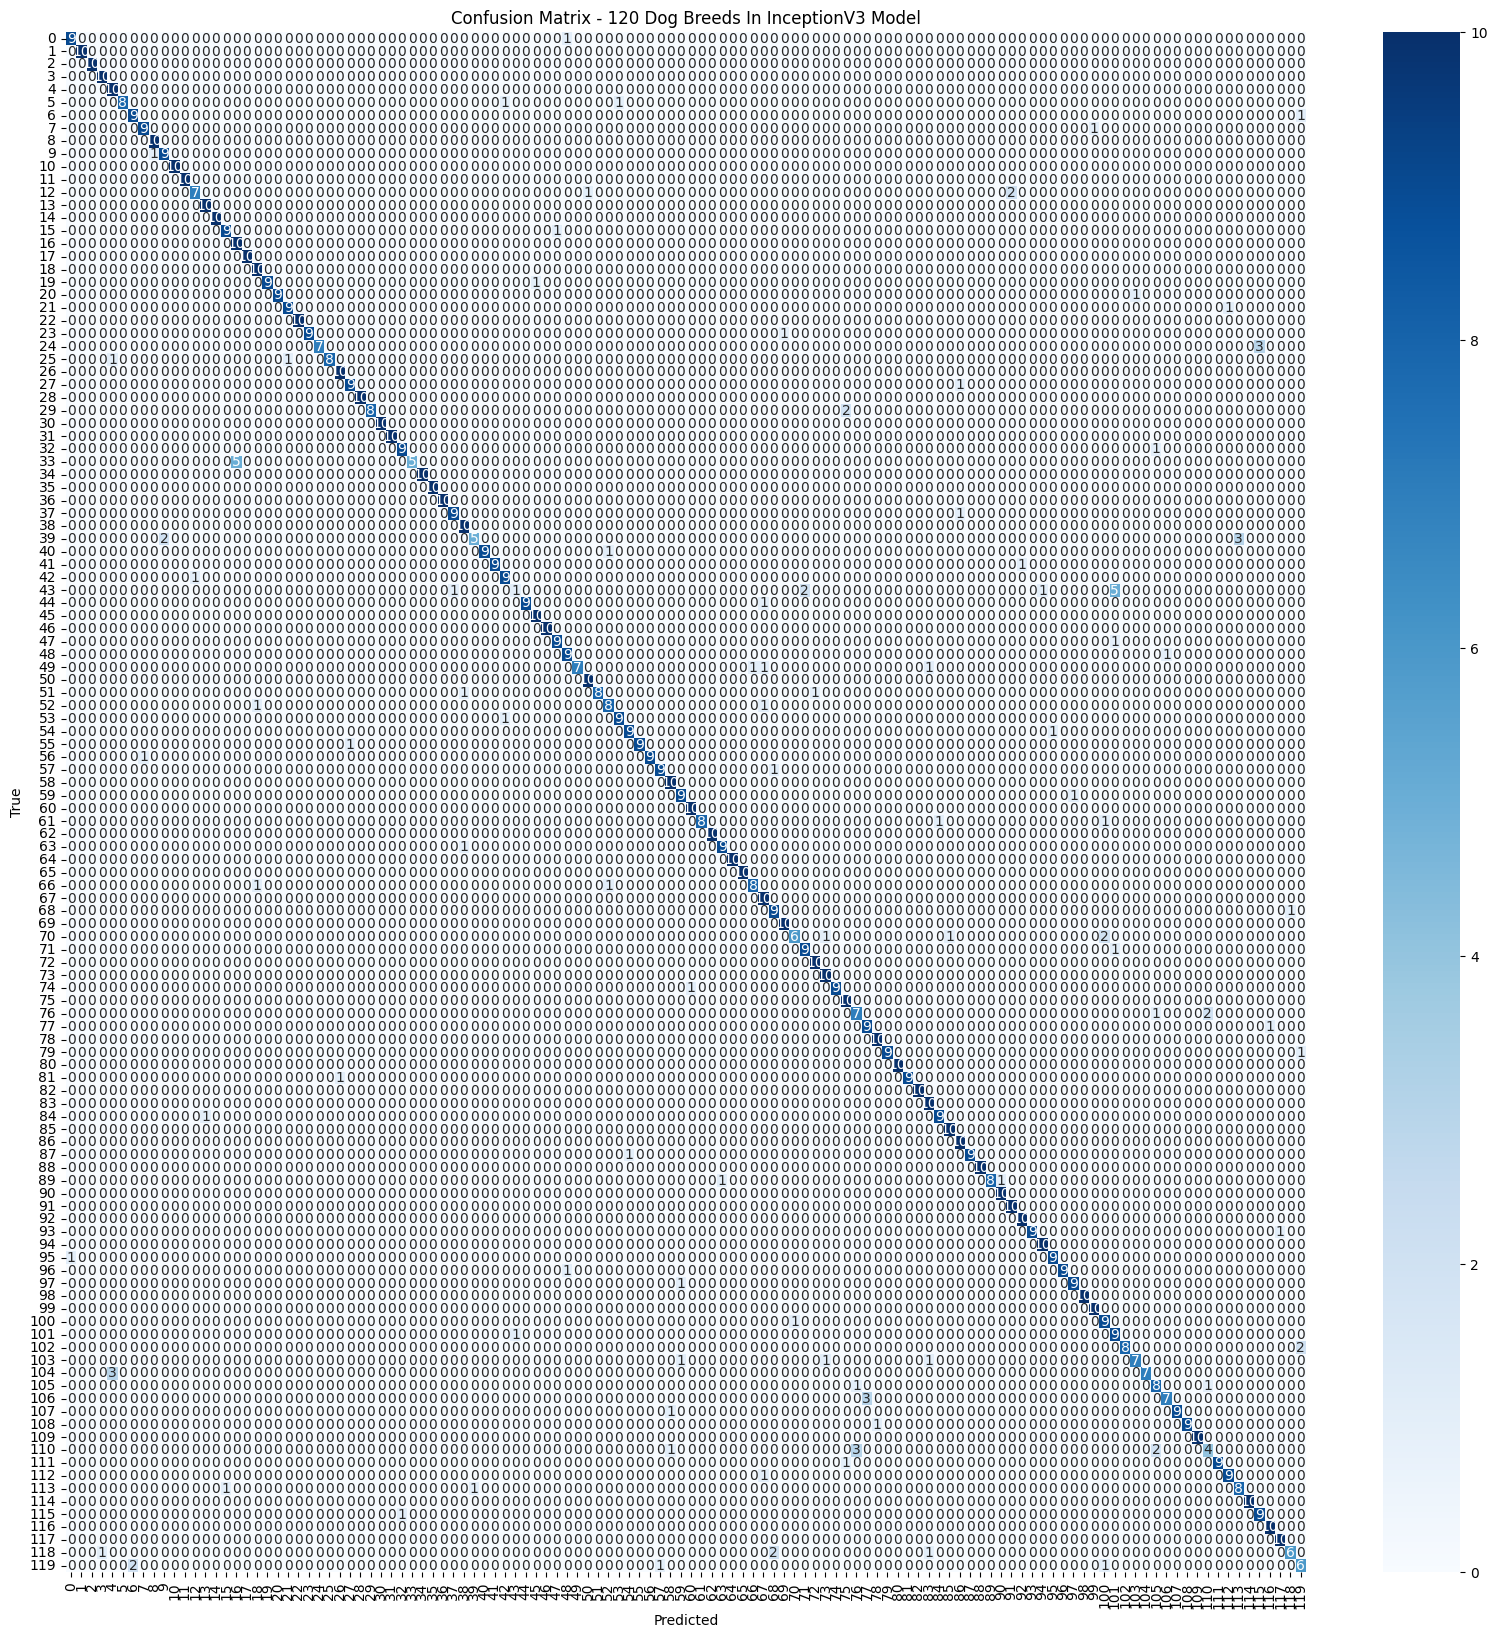

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


confusion_matrix = confusion_matrix(y_true, y_pred_classes)


class_names = [str(i) for i in range(120)]


plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - 120 Dog Breeds In InceptionV3 Model")

In [ ]:

y_true = to_categorical(testing_generator.labels)
y_pred_classes = to_categorical(y_pred_classes)

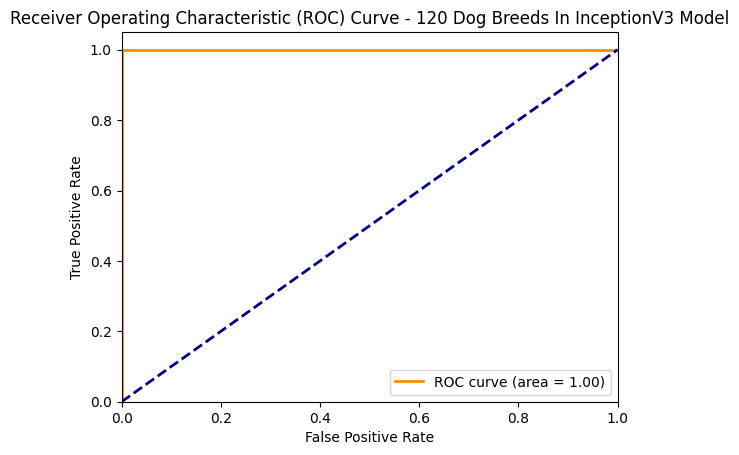

In [ ]:

# fpr, tpr, thresholds = roc_curve(y_true[:, 1], y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_true[:, 1], y_pred_classes[:, 1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - 120 Dog Breeds In InceptionV3 Model')
plt.legend(loc="lower right")
plt.show()